In [1]:
# Nos aseguramos que tenemos TF 2. 
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [3]:
url = 'https://raw.githubusercontent.com/pfernandez-sanofi/ml_tutorials/main/DATA/spam.csv'
df = pd.read_csv(url, encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# Eliminamos columnas que no nos sirven
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# rename columns to something better
df.columns = ['labels', 'data']

In [8]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Creamos variable objetivo.
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [10]:
# Set entrenamiento y prueba con Keras
df_train, df_test, Ytrain, Ytest = train_test_split(
    df['data'], Y, test_size=0.33
)

In [11]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 20000. # Cantidad máxima de palabras en el diccionario.
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [12]:
sequences_train[0]  # Crea un ID numérico para cada palabra.

[1,
 55,
 13,
 185,
 5,
 103,
 281,
 173,
 1455,
 159,
 93,
 415,
 2,
 813,
 3,
 32,
 13,
 23,
 48,
 1,
 436,
 98,
 223,
 1,
 1765,
 13,
 1456,
 1254,
 185,
 5,
 43,
 42,
 67,
 2292,
 1766,
 1457]

In [13]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Tenemos %s tokens unicos.' % V)

Tenemos 7289 tokens unicos.


In [14]:
# Padding crea una matriz N * T, lo que nos permitirá entrenar la RN
# Crea ceros en donde no aparecen ciertos elementos. Esto es parecido
# a lo que vimos con la detección de imágenes y la matriz de grises.
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# Largo de la secuencia
T = data_train.shape[1]

Shape of data train tensor: (3733, 189)


In [15]:
data_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [16]:
data_train[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [17]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


In [24]:
# Creamos el Modelo. Ahora vamos a crear una red convolucional.

# Seleccionamos las dimensiones del embedding (dimensionality) 
# Mientras más pequeño, más precisión, pero más recursos vamos a necesitar.
# Lo dejaremos en 20 para iniciar, pero si tienes problemas de memoria
# podrías tratar con un número mayor. 
D = 20

# Nota, al crear el tamaño del embedding necesario en Keras, 
# lo configuramos como (V + 1) x D. Esto por como se manejan los índices en
# la matriz de keras.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)


In [25]:
# Compile and fit
# Esto toma un tiempo. 
model.compile(
  loss='binary_crossentropy',  # clasificación binaria
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=10,
  validation_data=(data_test, Ytest)
)

Training model...
Epoch 1/10
117/117 [==============================] - 2s 8ms/step - loss: 0.3705 - accuracy: 0.8693 - val_loss: 0.2822 - val_accuracy: 0.8592
Epoch 2/10
117/117 [==============================] - 1s 6ms/step - loss: 0.1538 - accuracy: 0.9320 - val_loss: 0.1091 - val_accuracy: 0.9679
Epoch 3/10
117/117 [==============================] - 1s 6ms/step - loss: 0.0305 - accuracy: 0.9922 - val_loss: 0.0749 - val_accuracy: 0.9810
Epoch 4/10
117/117 [==============================] - 1s 6ms/step - loss: 0.0068 - accuracy: 0.9989 - val_loss: 0.0714 - val_accuracy: 0.9821
Epoch 5/10
117/117 [==============================] - 1s 6ms/step - loss: 0.0039 - accuracy: 0.9995 - val_loss: 0.0917 - val_accuracy: 0.9799
Epoch 6/10
117/117 [==============================] - 1s 6ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0991 - val_accuracy: 0.9793
Epoch 7/10
117/117 [==============================] - 1s 7ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0883 - val_accur

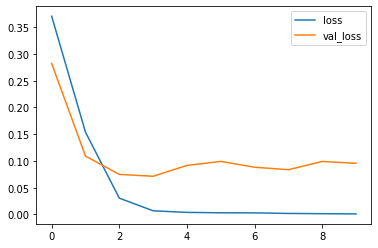

In [26]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

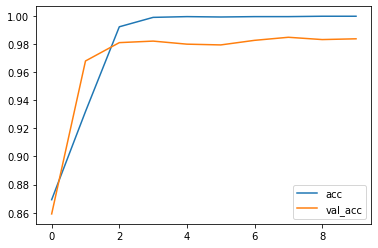

In [27]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Evaluamos

In [28]:

y_pred = model.predict(data_test).argmax(axis=1)

58/58 [==============================] - 0s 2ms/step


In [30]:
# Veamos donde hemos fallado
misclassified_idx = np.where(y_pred != Ytest)[0] # escogemos los fallos
i = np.random.choice(misclassified_idx) # Randómicamente elegimos uno
print('id %s' %(i))
print(df.values[i])
print("Realmente es: %s Y se predijo: %s" % (Ytest[i], y_pred[i]))

id 224
['spam'
 '500 New Mobiles from 2004, MUST GO! Txt: NOKIA to No: 89545 & collect yours today!From ONLY å£1 www.4-tc.biz 2optout 087187262701.50gbp/mtmsg18'
 1]
Realmente es: 1 Y se predijo: 0
